In [27]:
import pandas as pd

df = pd.read_csv("train.csv")
df

,Age,BMI,High Blood Pressure,Fasting Blood Glucose,HbA1c Level,Smoking,Diagnosis
0,63,27,1,158,6.5,0,0
1,25,25,0,85,5.0,0,0
2,21,28,0,155,5.8,0,0
3,47,29,0,159,3.5,1,0
4,53,29,0,126,5.8,1,0
...,...,...,...,...,...,...,...
70699,62,27,0,160,4.0,0,0
70700,35,31,1,140,6.0,1,0
70701,56,31,0,160,5.7,0,1
70702,37,21,0,159,6.5,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70704 entries, 0 to 70703
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    70704 non-null  int64  
 1   BMI                    70704 non-null  int64  
 2   High Blood Pressure    70704 non-null  int64  
 3   Fasting Blood Glucose  70704 non-null  int64  
 4   HbA1c Level            70704 non-null  float64
 5   Smoking                70704 non-null  int64  
 6   Diagnosis              70704 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 3.8 MB


In [37]:
x = df[["Age", "BMI", "HbA1c Level", "Fasting Blood Glucose", "High Blood Pressure", "Smoking"]].to_numpy()
y = df["Diagnosis"].to_numpy()

print(x.shape, y.shape)

(70704, 6) (70704,)


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(53028, 6) (53028,)
(17676, 6) (17676,)


In [39]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(x_train)  #mean, std 계산 
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

In [26]:
from sklearn.linear_model import SGDClassifier   #추정기 클래스

sc = SGDClassifier(loss='log_loss',   # Loss function (손실 함수)
                   max_iter=1000,        # Epoch (전체 샘플을 다 이용함!) 기본값 = 1000
                   random_state=42)         

# Loss = "Log loss" -> 로지스틱 회귀
# Loss = "hinge" -> 서포트 벡터 머신(Support Vector Machine, SVM)

sc.fit(x_train_scaled, y_train)

print("학습용 데이터셋:", sc.score(x_train_scaled, y_train))
print("시험용 데이터셋:", sc.score(x_test_scaled, y_test))

학습용 데이터셋: 0.9548917552990873
시험용 데이터셋: 0.9535528400090518


In [6]:
sc.partial_fit(x_train_scaled, y_train)

print("학습용 데이터셋:", sc.score(x_train_scaled, y_train))
print("시험용 데이터셋:", sc.score(x_test_scaled, y_test))

학습용 데이터셋: 0.9553632043448744
시험용 데이터셋: 0.9540620049785019


In [7]:
sc = SGDClassifier(loss='log_loss', random_state=42)
import numpy as np

train_score= []
test_score = []

for _ in range(0 ,500, 1):
    sc.partial_fit(x_train_scaled, y_train, classes=np.unique(y_train))
    train_score.append(sc.score(x_train_scaled, y_train))
    test_score.append(sc.score(x_test_scaled, y_test))

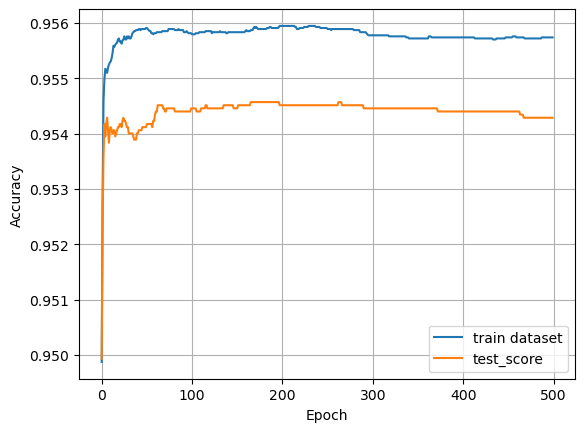

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_score, label="train dataset")
plt.plot(test_score, label="test_score")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [31]:
sc = SGDClassifier(loss='log_loss',   # Loss function (손실 함수)
                   max_iter=400,
                   tol=None,
                   random_state=42)         

# Loss = "Log loss" -> 로지스틱 회귀
# Loss = "hinge" -> 서포트 벡터 머신(Support Vector Machine, SVM)

sc.fit(x_train_scaled, y_train)

print("학습용 데이터셋:", sc.score(x_train_scaled, y_train))
print("시험용 데이터셋:", sc.score(x_test_scaled, y_test))

학습용 데이터셋: 0.9557026476578412
시험용 데이터셋: 0.9543448744059742


In [45]:
sc = SGDClassifier(loss='hinge',   # Loss function (손실 함수)
                   max_iter=500,
                   tol=None,
                   random_state=42)         

# Loss = "Log loss" -> 로지스틱 회귀
# Loss = "hinge" -> 서포트 벡터 머신(Support Vector Machine, SVM)

sc.fit(x_train_scaled, y_train)

print("학습용 데이터셋:", sc.score(x_train_scaled, y_train))
print("시험용 데이터셋:", sc.score(x_test_scaled, y_test))

학습용 데이터셋: 0.9559100852379875
시험용 데이터셋: 0.9549106132609188


In [41]:
df2 = pd.read_csv('test.csv')

y_predicted = df2[["Age", "BMI", "HbA1c Level", "Fasting Blood Glucose", "High Blood Pressure", "Smoking"]].to_numpy()
print(y_predicted.shape)

(17676, 6)


In [42]:
ss.fit(y_predicted)
y_predict_scaled = ss.transform(y_predicted)

In [43]:
y_predict = sc.predict(y_predict_scaled)

df2["Diagnosis"] = y_predict
df2

,Age,BMI,High Blood Pressure,Fasting Blood Glucose,HbA1c Level,Smoking,Diagnosis
0,51,20,0,159,6.2,1,0
1,14,20,0,158,6.1,0,0
2,38,27,0,200,5.8,0,0
3,16,17,0,126,3.5,1,0
4,80,31,1,100,4.8,0,0
...,...,...,...,...,...,...,...
17671,8,23,0,126,5.7,0,0
17672,43,27,0,80,5.8,0,0
17673,11,20,0,160,5.8,0,0
17674,24,27,0,90,5.8,0,0


In [44]:
import pandas as pd
import numpy as np

f = pd.read_csv("submission.csv")

f.dropna(axis=1, inplace=True)

# 아래 "np.arange(0, df.shape[0], 1)" 부분을, 솜솜이가 만든 모델이 예측한 값으로 대체!
y_pred = y_predict 

f["Diagnosis"] = y_pred
f.to_csv("new_submission.csv", index=False)